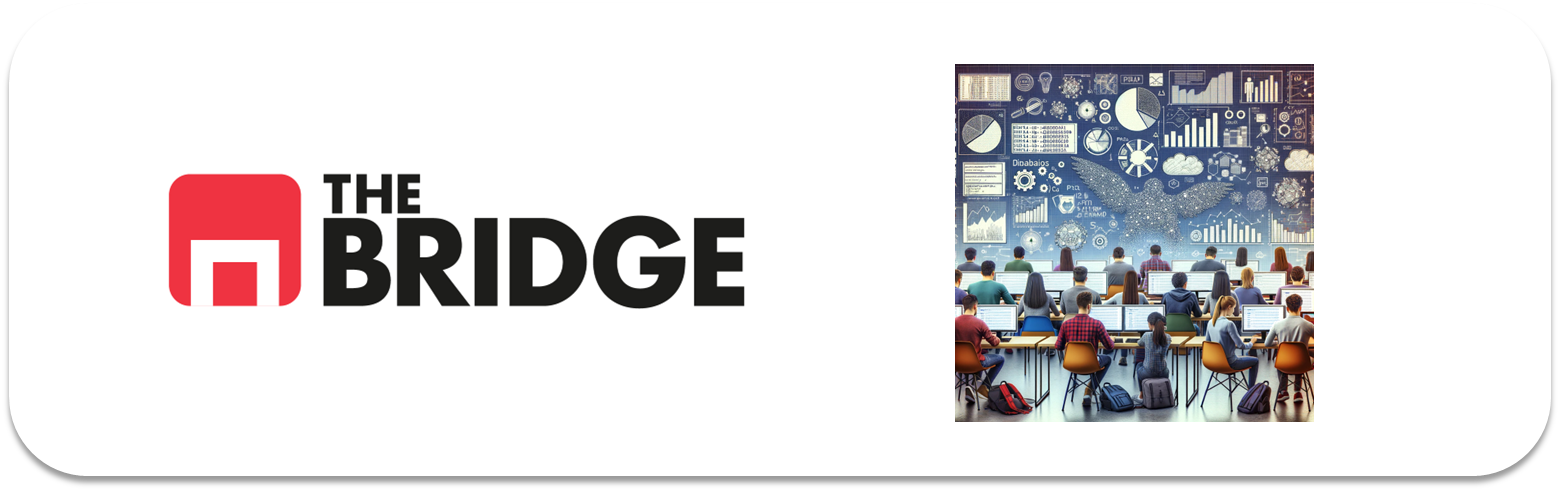

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [73]:
#Importamos las librerías necesarias
import bootcampviztools as viz

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import MinMaxScaler

# 1. Carga de datos y clasificación de variables

Comenzamos cargando el dataset y clasificamos las variables

In [74]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Realizamos la clasificación de variables

In [76]:
#Creamos una función para clasificar las variables
def tipifica_variables(df, umbral_categoria, umbral_continua):

    #Creamos una lista con el tipo de cada variable
    lista_tipos = []
        
    #Creamos una lista con la tipificación sugerida para cada variable
    lista_tipificacion = []

    #Creamos dos listas para guardar la cardinalidad de cada variable
    lista_cardinalidad = []
    lista_cardinalidad_porcentaje = []

    #Sugerimos la tipificación de la variable y la guardamos en la lista
    for columna in df.columns:
            
        #Guardamos en la lista el tipo de cada variable
        lista_tipos.append(df[columna].dtypes)
            
        #Calculamos la cardinalidad y la guardamos en las listas
        cardinalidad = df[columna].nunique()
        lista_cardinalidad.append(cardinalidad)
        
        cardinalidad_porcentaje = round(cardinalidad/len(df)*100,2)
        lista_cardinalidad_porcentaje.append(cardinalidad_porcentaje)

        #Clasificamos segun el valor de la cardinalidad
        if cardinalidad == 2:
            lista_tipificacion.append("Binaria")
                
        elif cardinalidad >= umbral_categoria:
                
            if cardinalidad >= umbral_continua:
                lista_tipificacion.append("Numérica continua")
                    
            else: 
                lista_tipificacion.append("Numérica discreta")

        else:
            lista_tipificacion.append("Categórica")

        
    #Creamos el DataFrame con tantas filas como columnas tenga el DataFrame
    df_tipifica = pd.DataFrame({"nombre_variable": df.columns.tolist(), "tipo_variable":lista_tipos, "cardinalidad":lista_cardinalidad, "cardinalidad_porcentaje":lista_cardinalidad_porcentaje , "tipo_sugerido":lista_tipificacion})
    
    return df_tipifica

In [77]:
tipifica_variables(df,umbral_categoria=10,umbral_continua=20)

,nombre_variable,tipo_variable,cardinalidad,cardinalidad_porcentaje,tipo_sugerido
0,CRIM,float64,504,99.60,Numérica continua
1,ZN,float64,26,5.14,Numérica continua
2,INDUS,float64,76,15.02,Numérica continua
3,CHAS,float64,2,0.40,Binaria
4,NOX,float64,81,16.01,Numérica continua
5,RM,float64,446,88.14,Numérica continua
6,AGE,float64,356,70.36,Numérica continua
7,DIS,float64,412,81.42,Numérica continua
8,RAD,float64,9,1.78,Categórica
9,TAX,float64,66,13.04,Numérica continua


Clasificamos las variables:
* CRIM: Numérica continua
* ZN: Numérica continua
* INDUS: Numérica continua
* CHAS: Categórica (binaria)
* NOX: Numérica continua
* RM: Numérica continua
* AGE: Numérica continua
* DIS: Numérica continua
* RAD: Categórica
* TAX: Numérica continua
* PTRATIO: Numérica continua
* LSTAT: Numérica continua
* MEDV: Numérica continua

# 2. Elección del *target*, elección del modelo y separación en train y test

Vemos que la variable *target* será "MEDV" (numérica continua)

In [78]:
target = "MEDV"

Revisamos la distribución de la variable *target*

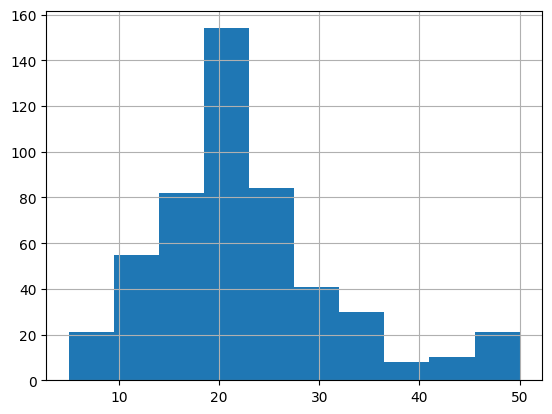

In [79]:
df[target].hist();

La distribución se podría asemejar en cierto grado a una distribución normal (aunque los ultimos valores "rompen" esta tendencia). No obstante, dado que la distribución se parece en cierto grado a una distribución normal, usamos el método de regresión lineal ya que la variable es numérica continua

Realizamos la división del DataFrame en train y test con la relación 80/20

In [80]:
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)

# 3. Proceso EDA

## 3.1. Variables categóricas

Realizamos el análisis univariante de las variables categóricas

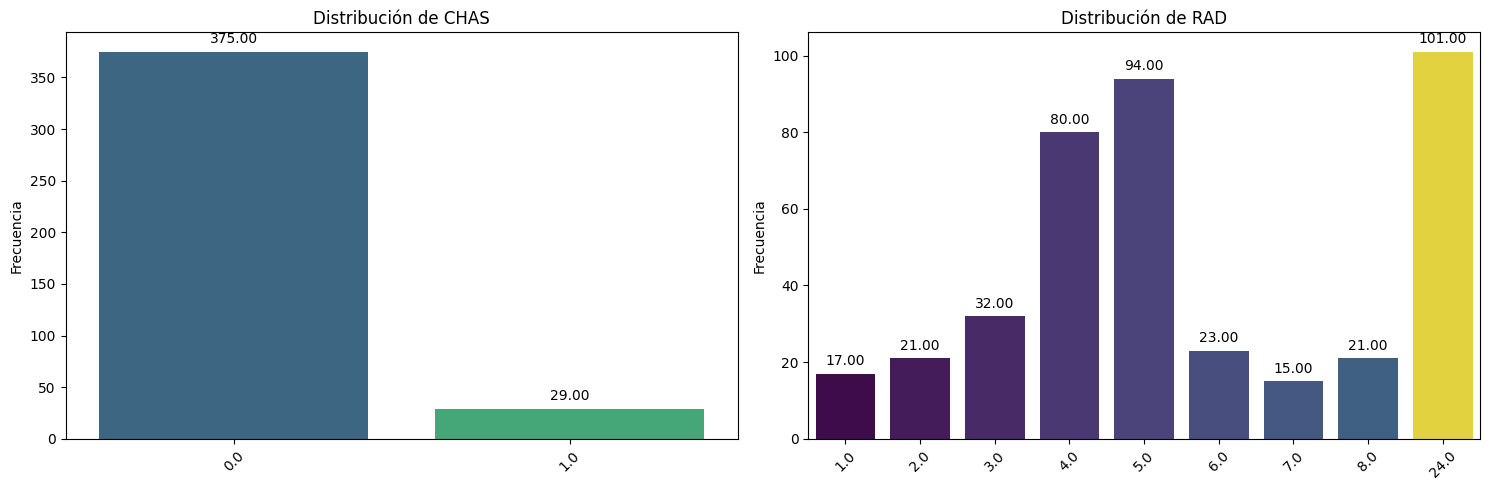

In [81]:
viz.pinta_distribucion_categoricas(train_set, columnas_categoricas=["CHAS","RAD"], relativa=False, mostrar_valores=True)

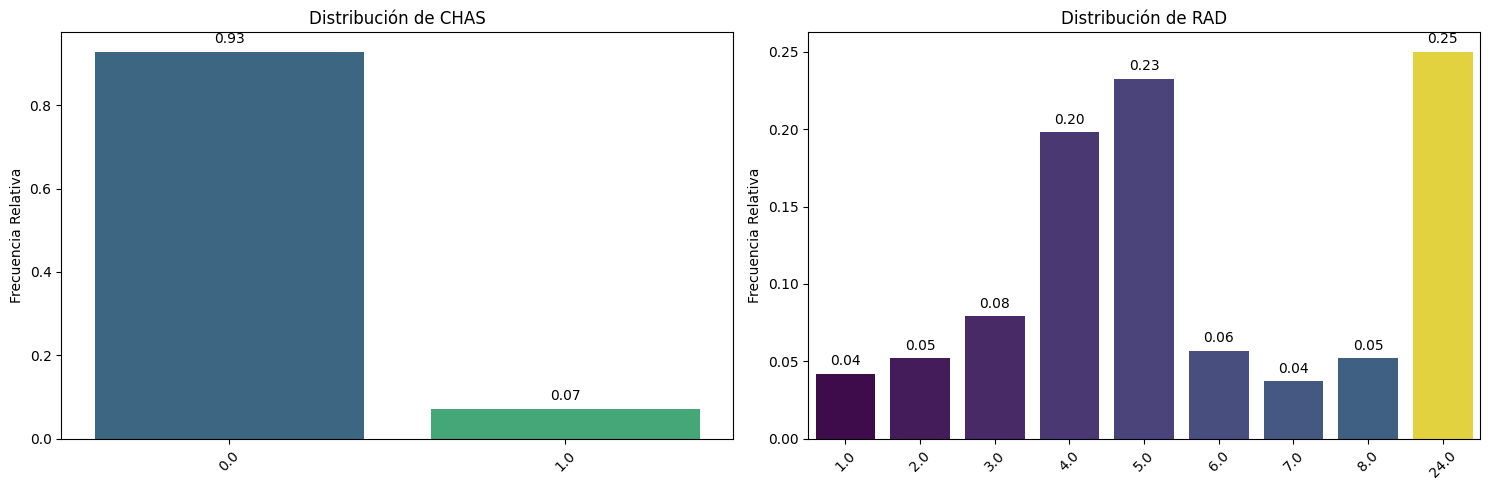

In [82]:
viz.pinta_distribucion_categoricas(train_set, columnas_categoricas=["CHAS","RAD"], relativa=True, mostrar_valores=True)

Comentarios:
* La variable "CHAS" está muy desbalanceada en favor del valor 0.0
* La variable "RAD" tiene la acumulación de frecuencias en los valores 4.0, 5.0 y 24.0

Realizamos el análisis bivariante de las variables categóricas con el *target*

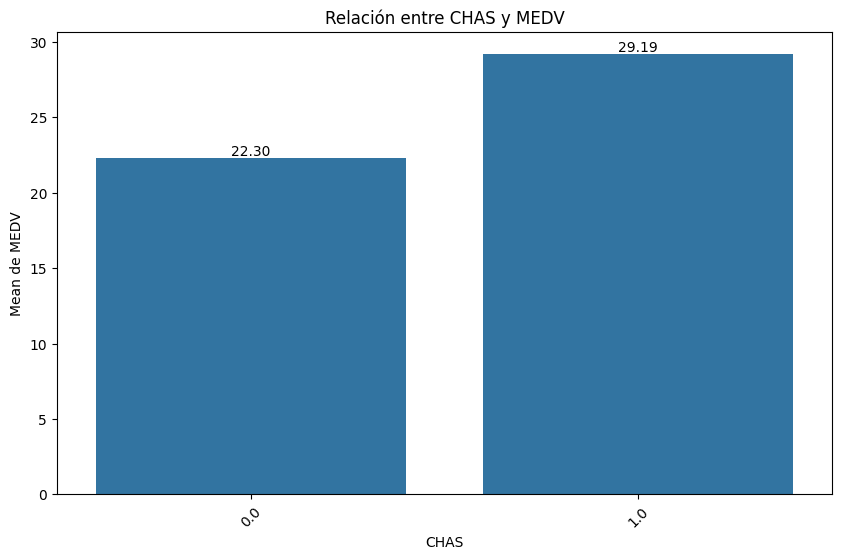

In [83]:
viz.plot_categorical_numerical_relationship(train_set, categorical_col="CHAS", numerical_col="MEDV", show_values=True, measure="mean")

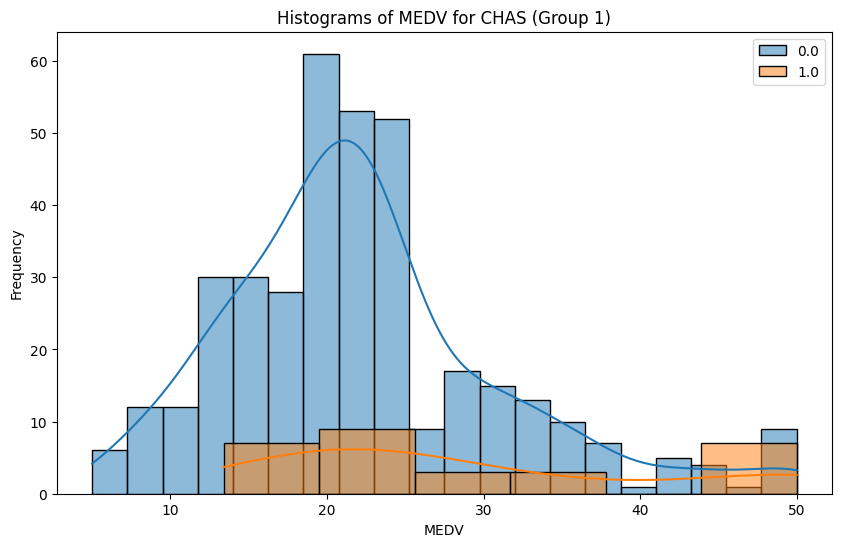

In [84]:
viz.plot_grouped_histograms(train_set, cat_col="CHAS", num_col="MEDV", group_size=2)

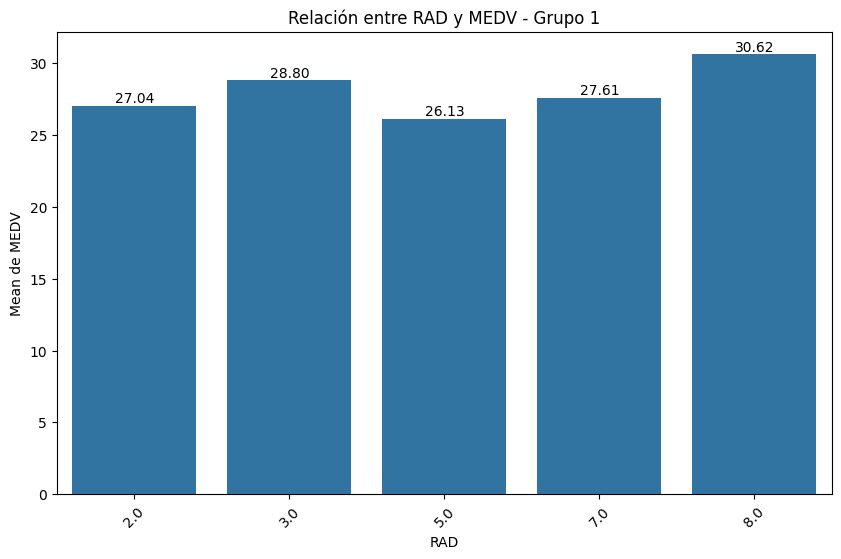

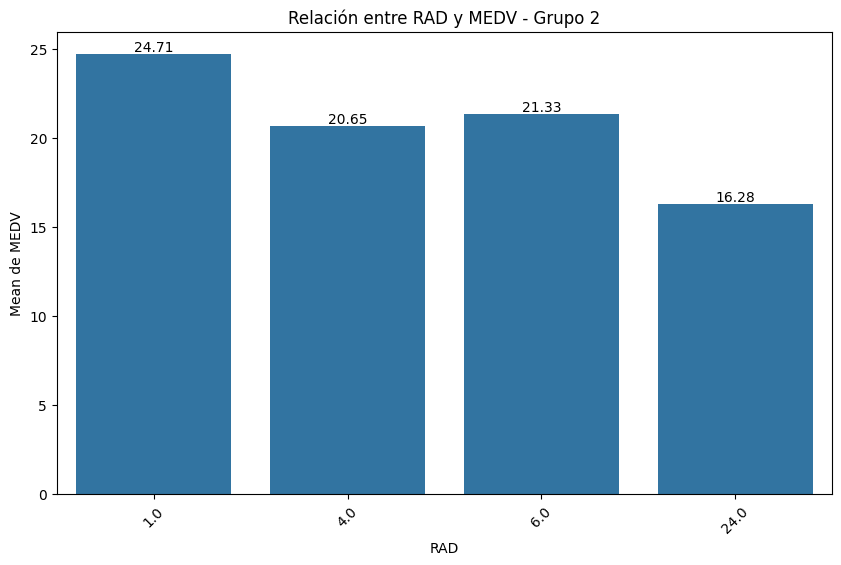

In [85]:
viz.plot_categorical_numerical_relationship(train_set, categorical_col="RAD", numerical_col="MEDV", show_values=True, measure="mean")

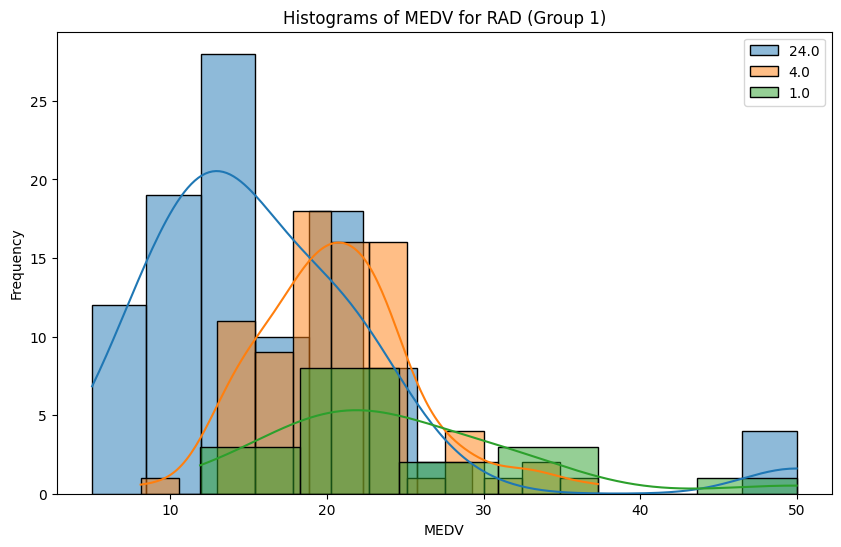

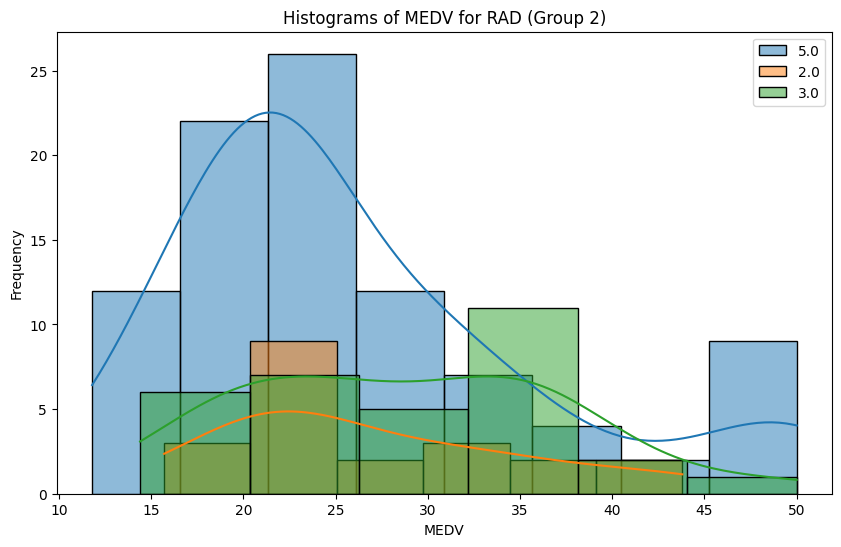

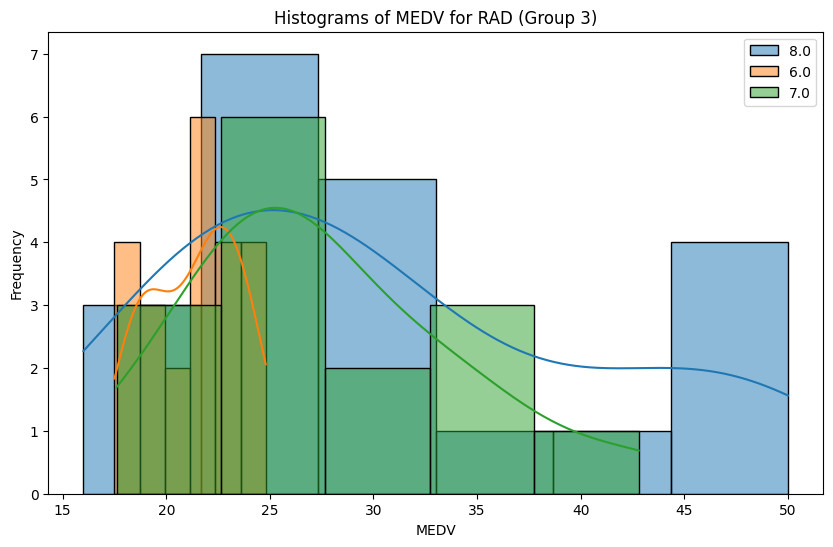

In [86]:
viz.plot_grouped_histograms(train_set, cat_col="RAD", num_col="MEDV", group_size=3)

Vemos que las variables "CHAS" y "RAD" influyen en las distribuciones y las medias calculadas para "MEDV", existe un grado de relación entre éstas variables y el *target* y nos las quedamos como *features* categóricas

In [87]:
features_cat = ["CHAS", "RAD"]

## 3.2. Variables Numéricas

Realizamos el análisis univariante de las variables numéricas

In [88]:
columnas_numericas = train_set.drop(columns=["CHAS", "RAD", "MEDV"]).columns.tolist()
columnas_numericas

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']

In [89]:
train_set.describe()[columnas_numericas].T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.609125,8.875058,0.00906,0.081437,0.26139,3.202962,88.9762
ZN,404.0,11.569307,23.152481,0.00000,0.000000,0.00000,20.000000,100.0000
INDUS,404.0,10.985050,6.894618,0.74000,5.130000,8.56000,18.100000,27.7400
NOX,404.0,0.556484,0.117704,0.38500,0.452000,0.53800,0.631000,0.8710
RM,404.0,6.315891,0.709452,3.86300,5.890500,6.21000,6.636750,8.7800
AGE,404.0,68.556436,27.994922,2.90000,45.550000,77.70000,93.650000,100.0000
DIS,404.0,3.808195,2.131226,1.12960,2.087875,3.17575,5.400800,12.1265
TAX,404.0,404.032178,166.172655,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,404.0,18.318317,2.228701,12.60000,16.800000,18.70000,20.200000,22.0000
LSTAT,404.0,12.457351,7.110381,1.73000,6.772500,10.92500,16.372500,37.9700


(10, 2)


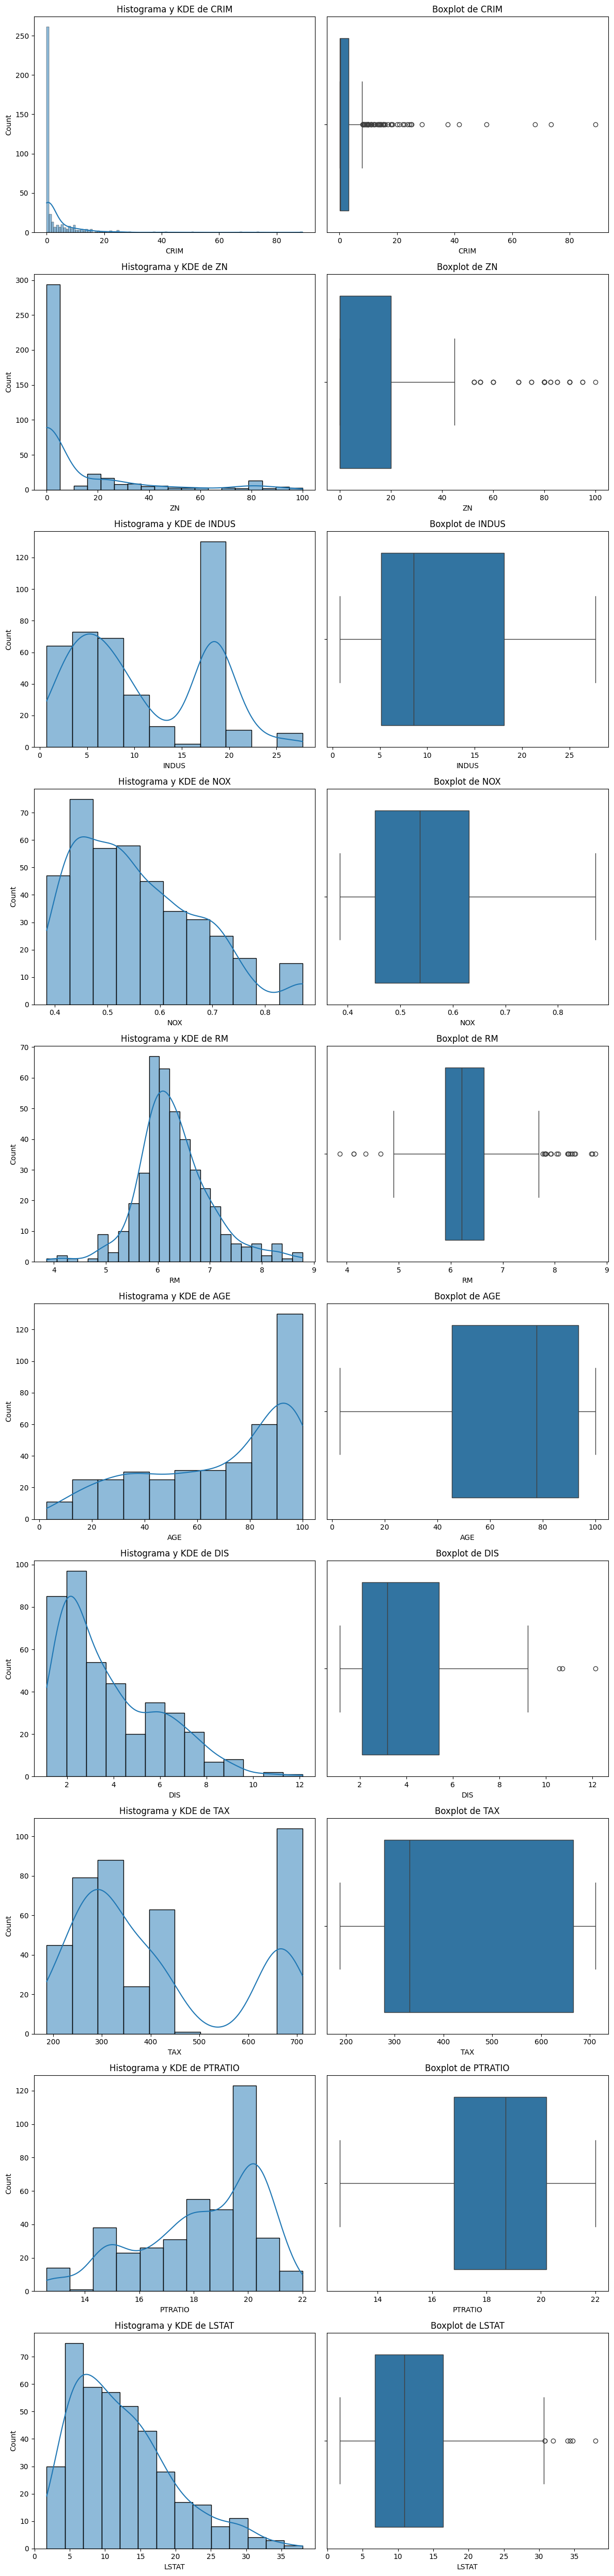

In [90]:
viz.plot_combined_graphs(train_set, columns=columnas_numericas)

Comentarios:
* Las variables "CRIM" y "ZN" presentan una clara distribucion con *heavy-tail*
* La variable "RM" presenta una distribución con cierta simetría

Realizamos el análisis bivariante de las variables numéricas con el *target*

In [91]:
#Mostramos los valores de correlación en valor absoluto y ordenados
train_set.corr(numeric_only=True)[["MEDV"]].abs().T.drop(columns=["CHAS","RAD","MEDV"]).T.sort_values(by="MEDV", ascending=False)

,MEDV
LSTAT,0.736422
RM,0.710680
PTRATIO,0.491210
INDUS,0.470546
TAX,0.459795
NOX,0.415768
CRIM,0.380091
AGE,0.340216
ZN,0.309504
DIS,0.235114


Las variables que mas destacan son "LSTAT" y "RM". A priori, todas las variables presentan cierta correlación con el *target* así que nos quedamos con todas como *features* numéricas

In [92]:
features_num = train_set.corr(numeric_only=True)[["MEDV"]].T.drop(columns=["CHAS", "RAD", "MEDV"]).T.sort_values(by="MEDV", ascending=False).index.tolist()
features_num

['RM', 'ZN', 'DIS', 'AGE', 'CRIM', 'NOX', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT']

**COMENTARIO**: Si siguieramos un proceso riguroso, las relaciones de las variables con el *target* se deben confirmar mediante los correspondientes tests. En este caso, y por simplicidad ya que no es el objetivo principal del bloque, no se realizan

# 4. Tratamiento de *features*

## 4.1. Features categóricas

Comentarios sobre las *features*:
1. CHAS: la variable ya tiene valores numéricos. No es necesario aplicar ninguna transformación
2. RAD: la variable ya tiene valores numéricos con valores que tienen una relación de orden ya que son índices, pero debemos cambiar el valor 24.0 por 9.0 para que el modelo no interprete que hay categorías intermedias

In [93]:
#Creamos una copia del DataFrame de train y aplicamos la transformación
train_set_transformado = train_set.copy()
train_set_transformado.loc[train_set_transformado["RAD"] == 24.0,"RAD"] = 9.0
train_set_transformado["RAD"].value_counts()

RAD
9.0    101
5.0     94
4.0     80
3.0     32
6.0     23
2.0     21
8.0     21
1.0     17
7.0     15
Name: count, dtype: int64

Aplicamos la transformación al DataFrame de test

In [94]:
test_set_transformado = test_set.copy()
test_set_transformado.loc[test_set_transformado["RAD"] == 24.0,"RAD"] = 9.0

## 4.2. Features numéricas

Comentarios sobre las *features*:
1. RM: debemos escalar el rango de valores
2. ZN: presenta una distribución con *heavy-tail* que debemos de tratar. Tambien debemos escalar el rango de valores
3. DIS: debemos escalar el rango de valores
4. AGE: debemos escalar el rango de valores
5. CRIM: presenta una distribución con *heavy-tail* que debemos de tratar. Tambien debemos escalar el rango de valores
6. NOX: el rango de valores se sitúa entre 0 y 1. No es necesario aplicar ninguna transformación
7. TAX: debemos escalar el rango de valores
8. INDUS: debemos escalar el rango de valores
9. PTRATIO: debemos escalar el rango de valores
10. LSTAT: debemos escalar el rango de valores

In [95]:
#Aplicamos el logaritmo a las variables que presentan distribución con heavy-tail
train_set_transformado["ZN"] = train_set_transformado["ZN"].apply(np.log).replace(-np.inf, 0)
train_set_transformado["CRIM"] = train_set_transformado["CRIM"].apply(np.log).replace(-np.inf, 0)
train_set_transformado[["ZN","CRIM"]].describe().T

,count,mean,std,min,25%,50%,75%,max
ZN,404.0,0.972703,1.622197,0.000000,0.000000,0.000000,2.995732,4.605170
CRIM,404.0,-0.776017,2.147413,-4.703886,-2.507962,-1.341778,1.163853,4.488369


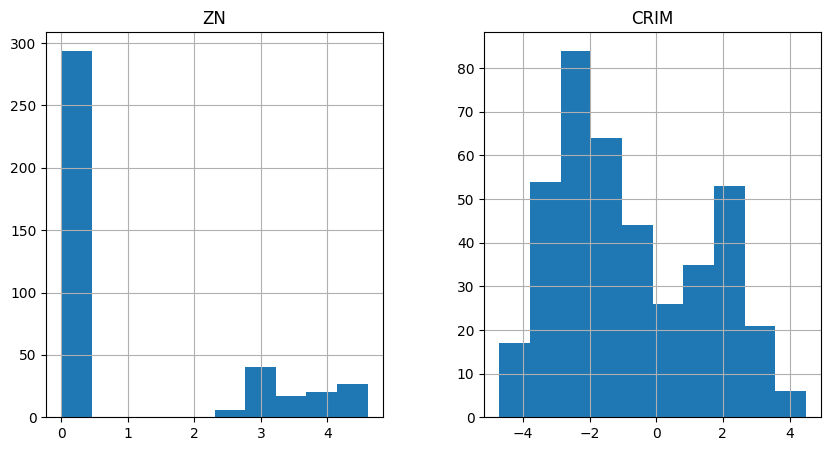

In [96]:
train_set_transformado[["ZN","CRIM"]].hist(figsize=(10,5));

In [97]:
#Escalamos las variables numéricas sin tener en cuentra "NOX" (que ya esta escalada entre 0 y 1) y el target
features_num_transformado = [feature for feature in features_num if feature != "NOX"]

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

for columna in features_num_transformado:
    train_set_transformado[columna] = min_max_scaler.fit_transform(train_set_transformado[[columna]])

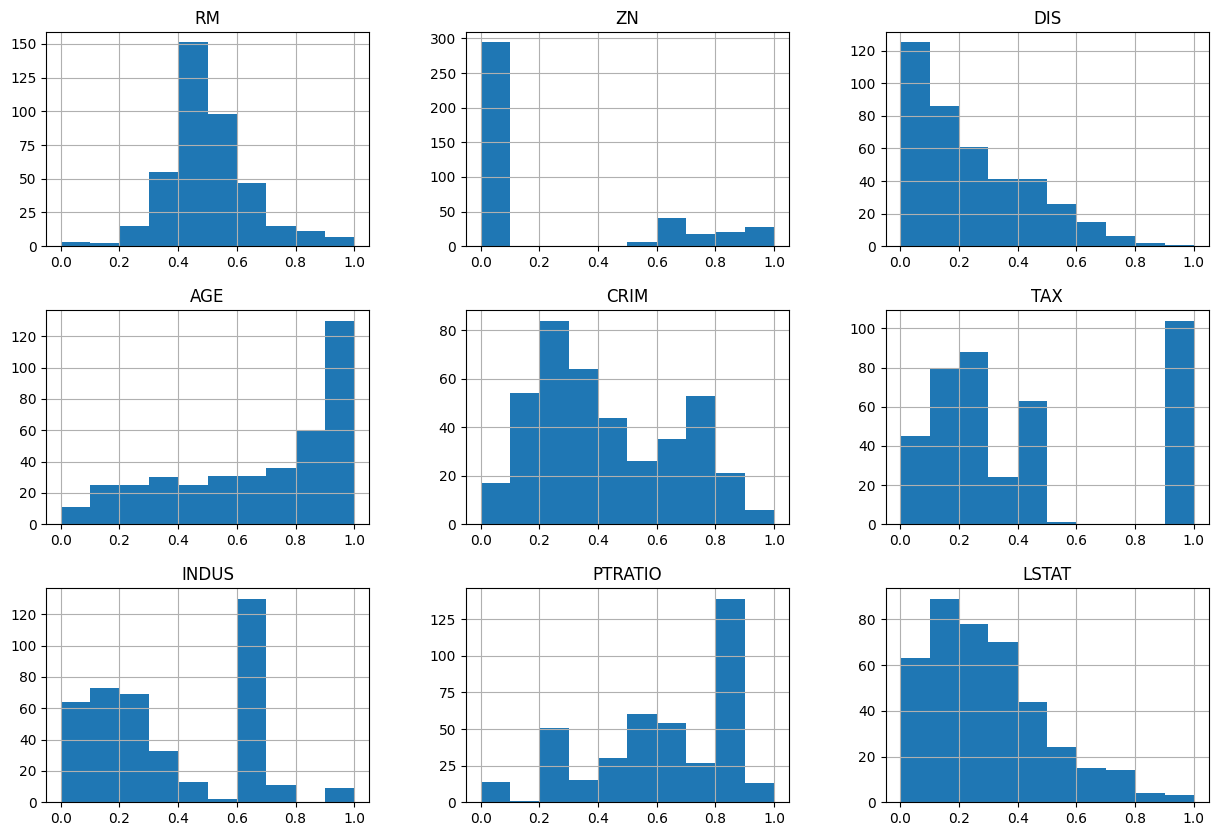

In [98]:
train_set_transformado[features_num_transformado].hist(figsize=(15,10));

Mejora en cierto grado la distribución de los valores. Aplicamos las mismas transformaciones al DataFrame de test

In [99]:
#Aplicamos el logaritmo a las variables que presentan distribución con heavy-tail
test_set_transformado["ZN"] = test_set_transformado["ZN"].apply(np.log).replace(-np.inf, 0)
test_set_transformado["CRIM"] = test_set_transformado["CRIM"].apply(np.log).replace(-np.inf, 0)

In [100]:
#Escalamos las variables numéricas sin tener en cuentra "NOX" (que ya esta escalada entre 0 y 1) y el target
for columna in features_num_transformado:
    test_set_transformado[columna] = min_max_scaler.fit_transform(test_set_transformado[[columna]])

# 5. Modelo de regresión lineal

Creamos los DataFrames de *features* y de *target* para train y test

In [101]:
X_train = train_set_transformado.drop(columns="MEDV")
y_train = train_set_transformado["MEDV"]

X_test = test_set_transformado.drop(columns="MEDV")
y_test = test_set_transformado["MEDV"]

Creamos el modelo de regresión lineal y lo entrenamos

In [102]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

Analizamos los coeficientes obtenidos para la regresión lineal

In [103]:
#Definimos una función para ver los coeficientes
def coeficientes_modelo(modelo, figsize=(10, 5)):
    df_coeficientes = pd.DataFrame(modelo.coef_, index=modelo.feature_names_in_, columns=["Coeficientes"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coeficientes.plot(kind="barh", ax=ax[0], legend=False)
    df_coeficientes.abs().sort_values(by="Coeficientes").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Coeficientes del modelo")

    fig.tight_layout()
    
    ax[0].grid()
    ax[1].grid()

    return df_coeficientes

,Coeficientes
CRIM,1.660718
ZN,1.601462
INDUS,0.464870
CHAS,3.353916
NOX,-17.787111
RM,21.452839
AGE,-0.879989
DIS,-14.976979
RAD,0.239401
TAX,-3.753282


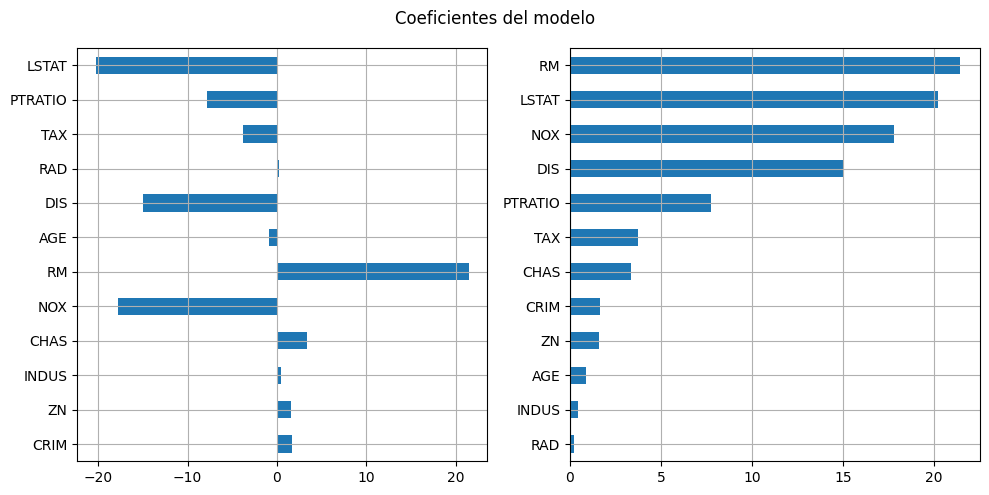

In [104]:
coeficientes_modelo(lin_reg)

Observamos que los coeficientes con mayor "peso" son los asociados a las *features*  "RM", "LSTAT", "NOX" y "DIS"

# 6. Evaluación de errores

Evaluamos los errores para train y test

In [131]:
#Definimos una función que nos devuelve un DataFrame y nos ayude a evaluar los errores
def compara_errores(modelo, X_train, y_train, X_test, y_test):
    
    #Calculamos las diferentes metricas para el train
    predicciones_train = modelo.predict(X_train)
    MAE_train = metrics.mean_absolute_error(y_train,predicciones_train)
    MSE_train = metrics.mean_squared_error(y_train,predicciones_train)
    RMSE_train = metrics.mean_squared_error(y_train,predicciones_train, squared = False)
    MAPE_train = metrics.mean_absolute_percentage_error(y_train,predicciones_train)
    R2_train = modelo.score(X_train, y_train)
    
    #Calculamos las diferentes metricas para el test
    predicciones_test = modelo.predict(X_test)
    MAE_test = metrics.mean_absolute_error(y_test,predicciones_test)
    MSE_test = metrics.mean_squared_error(y_test,predicciones_test)
    RMSE_test = metrics.mean_squared_error(y_test,predicciones_test, squared = False)
    MAPE_test = metrics.mean_absolute_percentage_error(y_test,predicciones_test)
    R2_test = modelo.score(X_test, y_test)
    
    #Creamos un DataFrame para comparar las métricas
    lista_metricas_train = [MAE_train,MSE_train,RMSE_train,MAPE_train,R2_train]
    lista_metricas_test = [MAE_test,MSE_test,RMSE_test,MAPE_test,R2_test]
    lista_metricas_diferencia = np.array(lista_metricas_test) - np.array(lista_metricas_train)

    diccionario_metricas = {"train":lista_metricas_train, "test": lista_metricas_test, "diferencia_test_train":lista_metricas_diferencia}

    df_metricas = pd.DataFrame(index=np.array(["MAE","MSE","RMSE","MAPE","R2"]), data=diccionario_metricas)
    
    return df_metricas

In [132]:
compara_errores(lin_reg,X_train,y_train,X_test,y_test)

,train,test,diferencia_test_train
MAE,3.484287,4.219848,0.735562
MSE,23.434632,29.027181,5.592549
RMSE,4.840933,5.387688,0.546755
MAPE,0.178639,0.226476,0.047837
R2,0.730244,0.604177,-0.126067


Visualizamos Predicciones Vs. Real en train y test

In [137]:
#Creamos una función que nos permitirá comparar las predicciones con el real en train y test
def compara_prediccion_real(modelo, X_train, y_train, X_test, y_test):
    
    predicciones_train = modelo.predict(X_train)
    predicciones_test =  modelo.predict(X_test)
    
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    
    #Agregamos titulo
    plt.suptitle("Comparación Predicciones Vs. Real")

    #TRAIN
    sns.scatterplot(y = y_train, x = predicciones_train, ax=axes[0])
    
    #Creamos la linea diagonal
    if min(predicciones_train) < min(y_train):
        minimo_train= min(predicciones_train)
    else:
        minimo_train = min(y_train)
    
    if max(predicciones_train) > max(y_train):
        maximo_train = max(predicciones_train)
    else:
        maximo_train = max(y_train)  
    
    axes[0].plot([minimo_train, maximo_train],[minimo_train, maximo_train], color = "red", linestyle='--')
    
    #Acotamos los valores de los ejes X y Y
    axes[0].set_xlim(minimo_train,maximo_train)
    axes[0].set_ylim(minimo_train,maximo_train)
 
    #Indicamos el nombre de los ejes
    axes[0].set_xlabel("Predicciones train")
    axes[0].set_ylabel("Real train")
    
    #Mostramos la rejilla
    axes[0].grid()
    
    #TEST
    sns.scatterplot(y = y_test, x = predicciones_test, ax=axes[1])
    
    #Creamos la linea diagonal
    if min(predicciones_test) < min(y_test):
        minimo_test = min(predicciones_test)
    else:
        minimo_test = min(y_test)
    
    if max(predicciones_test) > max(y_test):
        maximo_test = max(predicciones_train)
    else:
        maximo_test = max(y_test)  
    
    axes[1].plot([minimo_test, maximo_test],[minimo_test, maximo_test], color = "red", linestyle='--')


    #Acotamos los valores de los ejes X y Y
    axes[1].set_xlim(minimo_test,maximo_test)
    axes[1].set_ylim(minimo_test,maximo_test)
    
    #Indicamos el nombre de los ejes
    axes[1].set_xlabel("Predicciones test")
    axes[1].set_ylabel("Real test")

    #Mostramos la rejilla
    axes[1].grid();

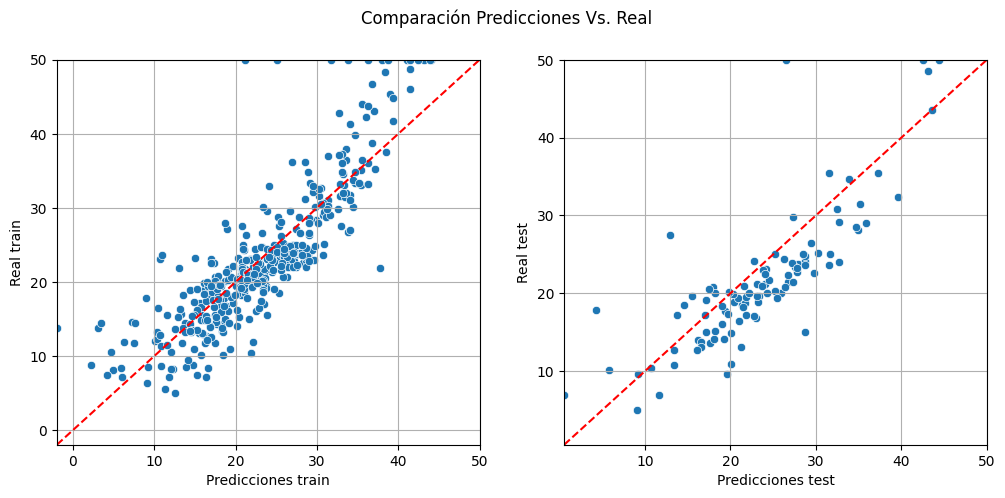

In [138]:
compara_prediccion_real(lin_reg, X_train, y_train, X_test, y_test)

Teniendo en cuenta que el rango de valores de "MEDV" se sitúa entre 5.0 y 50.0, parece que no se obtienen errores excesivamente altos tanto en train como en test (aunque esto habría que cotejarlo realmente con el conocimiento del sector o el criterio de alguien del negocio)

En test los errores son mayores para todas las métricas, pero la diferencia con el error de train es pequeña, por lo que se puede esperar que generalice bien. Podríamos mejorarlo aplicando regularización, mejorando *variance* a costa de aumentar *bias*

# 7. Ajuste del modelo

Regularizamos usando el método Elastic Net (combinación de Regularización L2 (Ridge) y L1(Lasso)) para varios valores de sus hiperparámetros

1. $alpha=0.4$ y $L1_{ratio}=0.4$:

In [139]:
#Creamos y entrenamos el modelo
elastic_reg_1 = ElasticNet(alpha=0.4, l1_ratio=0.4)
elastic_reg_1.fit(X_train,y_train)

#Comparamos los errores
compara_errores(elastic_reg_1, X_train, y_train, X_test, y_test)

,train,test,diferencia_test_train
MAE,5.549454,4.991597,-0.557857
MSE,59.673788,48.216366,-11.457422
RMSE,7.724881,6.943801,-0.781081
MAPE,0.280467,0.281073,0.000606
R2,0.313095,0.342508,0.029413


,Coeficientes
CRIM,-0.629597
ZN,1.215209
INDUS,-1.411322
CHAS,0.996708
NOX,-0.127010
RM,2.375563
AGE,-0.735729
DIS,0.000000
RAD,-0.521003
TAX,-1.420391


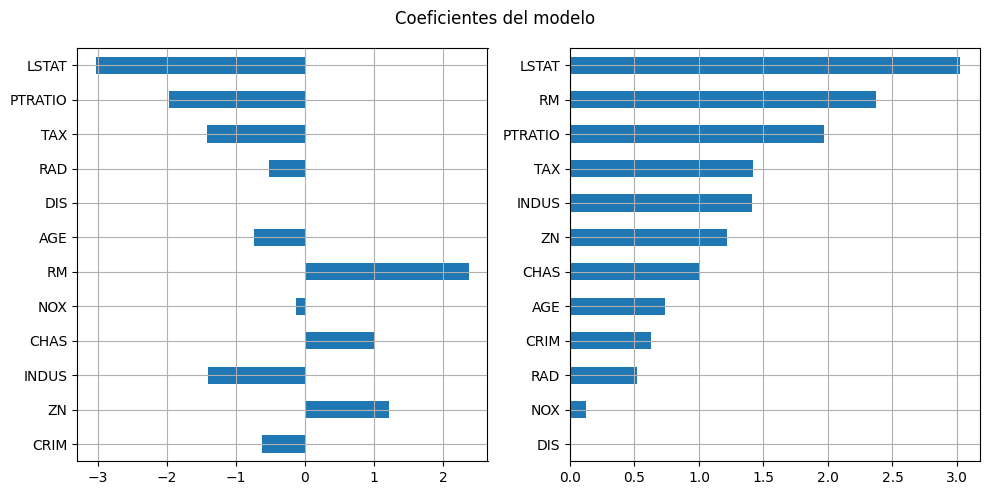

In [140]:
coeficientes_modelo(elastic_reg_1)

2. $alpha=0.4$ y $L1_{ratio}=0.1$:

In [141]:
#Creamos y entrenamos el modelo
elastic_reg_2 = ElasticNet(alpha=0.4, l1_ratio=0.1)
elastic_reg_2.fit(X_train,y_train)

#Comparamos los errores
compara_errores(elastic_reg_2, X_train, y_train, X_test, y_test)

,train,test,diferencia_test_train
MAE,5.649961,5.068945,-0.581016
MSE,61.617831,49.820378,-11.797453
RMSE,7.849703,7.058355,-0.791347
MAPE,0.285636,0.285474,-0.000162
R2,0.290717,0.320635,0.029918


,Coeficientes
CRIM,-0.766804
ZN,1.194089
INDUS,-1.317165
CHAS,1.017695
NOX,-0.424307
RM,1.971647
AGE,-0.842415
DIS,0.000000
RAD,-0.554178
TAX,-1.310614


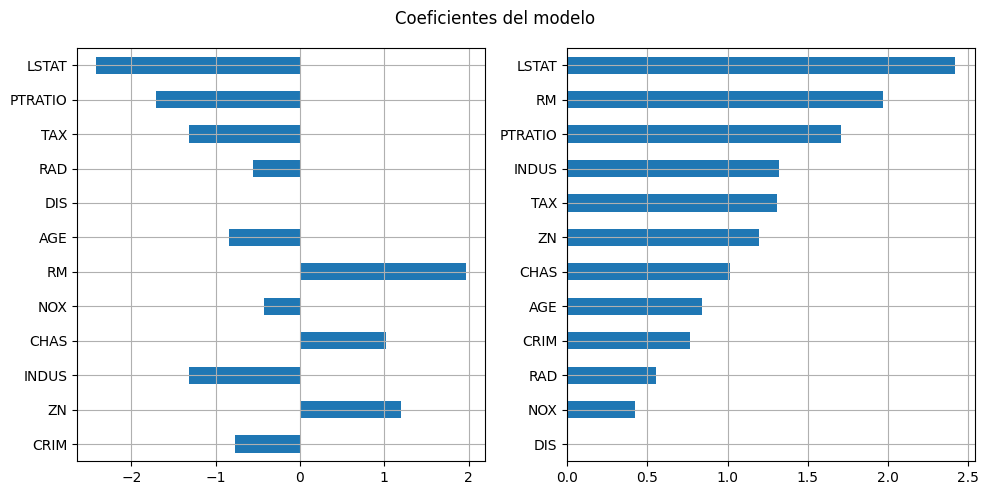

In [142]:
coeficientes_modelo(elastic_reg_2)

3. $alpha=0.4$ y $L1_{ratio}=1$:

In [143]:
#Creamos y entrenamos el modelo
elastic_reg_3 = ElasticNet(alpha=0.4, l1_ratio=1)
elastic_reg_3.fit(X_train,y_train)

#Comparamos los errores
compara_errores(elastic_reg_3, X_train, y_train, X_test, y_test)

,train,test,diferencia_test_train
MAE,4.260683,4.323613,0.062930
MSE,36.043114,32.232150,-3.810964
RMSE,6.003592,5.677337,-0.326255
MAPE,0.208634,0.233507,0.024873
R2,0.585108,0.560473,-0.024634


,Coeficientes
CRIM,-0.000000
ZN,0.000000
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,9.415322
AGE,-0.000000
DIS,-0.000000
RAD,-0.275064
TAX,-0.000000


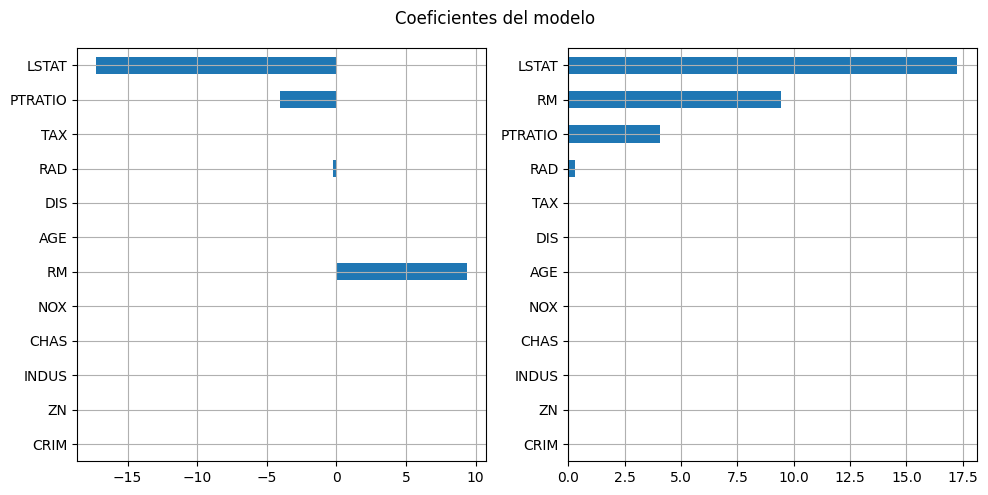

In [144]:
coeficientes_modelo(elastic_reg_3)

# 8. Conclusiones

El modelo de regresión lineal parece generalizar bien dada la pequeña diferencia entre el error de train y el de test (tiene baja *variance*). Aun así, hemos conseguido optimizar *variance* usando el método Elastic Net con los hiperparámetros $alpha=0.4$ y $L1_{ratio}=1$ (que es básicamente aplicar la regresión Lasso con un $alpha=0.4$) sin alterar demasiado el *bias*

In [145]:
compara_errores(lin_reg, X_train, y_train, X_test, y_test)

,train,test,diferencia_test_train
MAE,3.484287,4.219848,0.735562
MSE,23.434632,29.027181,5.592549
RMSE,4.840933,5.387688,0.546755
MAPE,0.178639,0.226476,0.047837
R2,0.730244,0.604177,-0.126067


In [146]:
compara_errores(elastic_reg_3, X_train, y_train, X_test, y_test)

,train,test,diferencia_test_train
MAE,4.260683,4.323613,0.062930
MSE,36.043114,32.232150,-3.810964
RMSE,6.003592,5.677337,-0.326255
MAPE,0.208634,0.233507,0.024873
R2,0.585108,0.560473,-0.024634


Escogería el modelo Lasso para optimizar y continuaría probando parámetros $alpha$ 